In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import pandas.plotting

In [2]:
old_data = pd.read_csv('final_dataset 2.csv')
data = old_data[['FTR','HTGD','ATGD','HTP','ATP','DiffFormPts','DiffPts','HM1', 'HM2','HM3','HM4','HM5','AM1','AM2','AM3','AM4','AM5']]
data.columns = ['Result','HTGD','ATGD','HTP','ATP','DiffFormPts','DiffPts','H1', 'H2','H3','H4','H5','A1','A2','A3','A4','A5']
y = pd.get_dummies(data["Result"])
y = y[['H']]
y = np.ravel(y)
display(data)
print(y)


,Result,HTGD,ATGD,HTP,ATP,DiffFormPts,DiffPts,H1,H2,H3,H4,H5,A1,A2,A3,A4,A5
0,H,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,M,M,M,M,M,M,M,M,M,M
1,H,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,M,M,M,M,M,M,M,M,M,M
2,NH,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,M,M,M,M,M,M,M,M,M,M
3,NH,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,M,M,M,M,M,M,M,M,M,M
4,H,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,M,M,M,M,M,M,M,M,M,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6835,H,-0.289474,0.710526,1.078947,1.842105,-0.263158,-0.763158,L,L,L,L,W,D,W,W,W,W
6836,NH,-0.473684,2.052632,0.947368,2.552632,-0.131579,-1.605263,W,D,W,D,L,W,D,W,W,W
6837,NH,-0.710526,-0.894737,0.868421,0.789474,-0.052632,0.078947,L,L,L,L,D,L,D,D,D,L
6838,H,0.973684,-0.078947,1.947368,1.236842,0.078947,0.710526,W,L,W,D,L,W,L,L,D,L


[1 1 0 ... 0 1 1]


array([[<AxesSubplot:xlabel='HTGD', ylabel='HTGD'>,
        <AxesSubplot:xlabel='ATGD', ylabel='HTGD'>,
        <AxesSubplot:xlabel='HTP', ylabel='HTGD'>,
        <AxesSubplot:xlabel='ATP', ylabel='HTGD'>,
        <AxesSubplot:xlabel='DiffFormPts', ylabel='HTGD'>,
        <AxesSubplot:xlabel='DiffPts', ylabel='HTGD'>],
       [<AxesSubplot:xlabel='HTGD', ylabel='ATGD'>,
        <AxesSubplot:xlabel='ATGD', ylabel='ATGD'>,
        <AxesSubplot:xlabel='HTP', ylabel='ATGD'>,
        <AxesSubplot:xlabel='ATP', ylabel='ATGD'>,
        <AxesSubplot:xlabel='DiffFormPts', ylabel='ATGD'>,
        <AxesSubplot:xlabel='DiffPts', ylabel='ATGD'>],
       [<AxesSubplot:xlabel='HTGD', ylabel='HTP'>,
        <AxesSubplot:xlabel='ATGD', ylabel='HTP'>,
        <AxesSubplot:xlabel='HTP', ylabel='HTP'>,
        <AxesSubplot:xlabel='ATP', ylabel='HTP'>,
        <AxesSubplot:xlabel='DiffFormPts', ylabel='HTP'>,
        <AxesSubplot:xlabel='DiffPts', ylabel='HTP'>],
       [<AxesSubplot:xlabel='HTGD', ylabel=

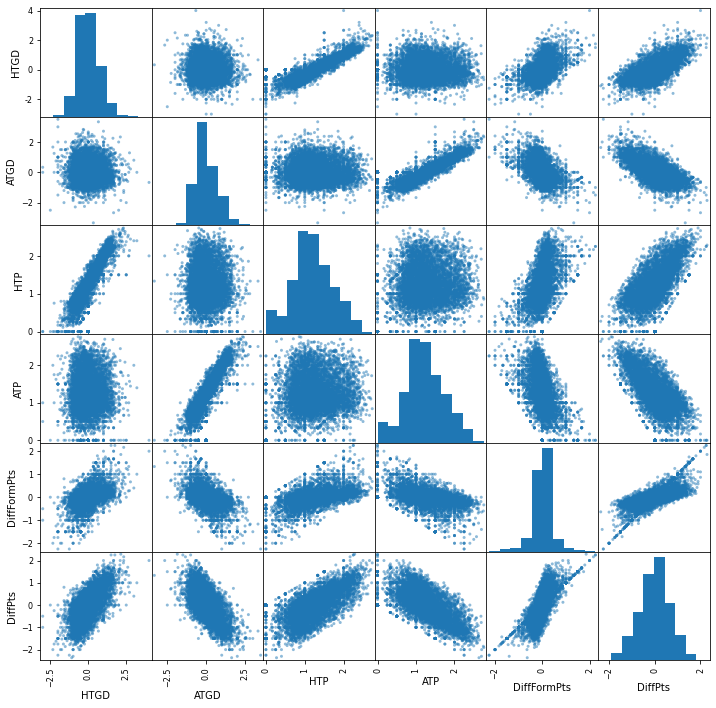

In [3]:
# To check whether the features I chose have enough correlation with the label (FTR - Full Time Result)
pd.plotting.scatter_matrix(data[['HTGD','ATGD','HTP','ATP','DiffFormPts','DiffPts']], figsize=(12, 12))

In [5]:
# Create the feature for the dataset
X = data.drop(['Result'],1)  
print (X)

# Create the label (Result) for the dataset


          HTGD      ATGD       HTP       ATP  DiffFormPts   DiffPts H1 H2 H3  \
0     0.000000  0.000000  0.000000  0.000000     0.000000  0.000000  M  M  M   
1     0.000000  0.000000  0.000000  0.000000     0.000000  0.000000  M  M  M   
2     0.000000  0.000000  0.000000  0.000000     0.000000  0.000000  M  M  M   
3     0.000000  0.000000  0.000000  0.000000     0.000000  0.000000  M  M  M   
4     0.000000  0.000000  0.000000  0.000000     0.000000  0.000000  M  M  M   
...        ...       ...       ...       ...          ...       ... .. .. ..   
6835 -0.289474  0.710526  1.078947  1.842105    -0.263158 -0.763158  L  L  L   
6836 -0.473684  2.052632  0.947368  2.552632    -0.131579 -1.605263  W  D  W   
6837 -0.710526 -0.894737  0.868421  0.789474    -0.052632  0.078947  L  L  L   
6838  0.973684 -0.078947  1.947368  1.236842     0.078947  0.710526  W  L  W   
6839 -0.578947 -0.315789  1.026316  1.289474    -0.105263 -0.263158  D  W  L   

     H4 H5 A1 A2 A3 A4 A5  
0     M  M 

In [6]:
X_new = pd.DataFrame(index = X.index)
for col, col_data in X.iteritems():
    if col_data.dtype == object:
        col_data = pd.get_dummies(col_data, prefix = col)               # Convert categorical into dummies values
    X_new = X_new.join(col_data)
print(X_new)
X = X_new
print(X)

          HTGD      ATGD       HTP       ATP  DiffFormPts   DiffPts  H1_D  \
0     0.000000  0.000000  0.000000  0.000000     0.000000  0.000000     0   
1     0.000000  0.000000  0.000000  0.000000     0.000000  0.000000     0   
2     0.000000  0.000000  0.000000  0.000000     0.000000  0.000000     0   
3     0.000000  0.000000  0.000000  0.000000     0.000000  0.000000     0   
4     0.000000  0.000000  0.000000  0.000000     0.000000  0.000000     0   
...        ...       ...       ...       ...          ...       ...   ...   
6835 -0.289474  0.710526  1.078947  1.842105    -0.263158 -0.763158     0   
6836 -0.473684  2.052632  0.947368  2.552632    -0.131579 -1.605263     0   
6837 -0.710526 -0.894737  0.868421  0.789474    -0.052632  0.078947     0   
6838  0.973684 -0.078947  1.947368  1.236842     0.078947  0.710526     0   
6839 -0.578947 -0.315789  1.026316  1.289474    -0.105263 -0.263158     1   

      H1_L  H1_M  H1_W  ...  A3_M  A3_W  A4_D  A4_L  A4_M  A4_W  A5_D  A5_L

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size = 0.5, random_state = 42)

clf = LogisticRegression(C=10000)

clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
acc_train1 = accuracy_score(y_train, y_pred_train)
loss1 = log_loss(y_train, y_pred_train)
print("Logistic Regression")
print("The training accuracy of the model is ", acc_train1)
print("The training loss for the model is ", loss1)


clf.fit(X_val, y_val)
y_pred_val = clf.predict(X_val)
loss2 = log_loss(y_val, y_pred_val)
acc_train2 = accuracy_score(y_val, y_pred_val)
print("The validation accuracy of the model is ", acc_train2)
print("The validation loss for the model is ", loss2)


clf.fit(X_test, y_test)
y_pred_test = clf.predict(X_test)
loss3 = log_loss(y_test, y_pred_test)
acc_train3 = accuracy_score(y_test, y_pred_test)
print("The test accuracy of the model is ", acc_train3)
print("The test loss for the model is: ", loss3)



Logistic Regression
The training accuracy of the model is  0.6465643274853801
The training loss for the model is  12.20735168642486
The validation accuracy of the model is  0.6900584795321637
The validation loss for the model is  10.705114264140049
The test accuracy of the model is  0.6710526315789473
The test loss for the model is:  11.361547151781407


In [12]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
clf2 = DecisionTreeClassifier(random_state=0)
clf2.fit(X_train, y_train)
y_pred_train = clf2.predict(X_train)
acc_train1 = accuracy_score(y_train, y_pred_train)
loss1 = log_loss(y_train, y_pred_train)
print("Decision Tree")
print("The training accuracy of the model is ", acc_train1)
print("The training loss for the model is ", loss1)

y_pred_val = clf2.predict(X_val)
acc_train2 = accuracy_score(y_val, y_pred_val)
loss2 = log_loss(y_val, y_pred_val)
print("The validation accuracy of the model is ", acc_train2)
print("The validation loss for the model is ", loss2)

y_pred_test = clf2.predict(X_test)
acc_train3 = accuracy_score(y_test, y_pred_test)
loss3 = log_loss(y_test, y_pred_test)
print("The test accuracy of the model is ", acc_train3)
print("The test loss for the model is ", loss3)

Decision Tree
The training accuracy of the model is  0.9798976608187134
The training loss for the model is  0.6943116592497226
The validation accuracy of the model is  0.5570175438596491
The validation loss for the model is  15.300242673805181
The test accuracy of the model is  0.5789473684210527
The test loss for the model is  14.542806352886698
